<a href="https://colab.research.google.com/github/Loon1/ProcessamendodeDados-usando-Python/blob/main/IAM_AVA01_DanielDoNascimentoGomes_EduardoSantanaSouza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal da Bahia <br>
Escola Politécnica <br>
Departamento de Engenharia Elétrica e de Computação <br>
Disciplina: Introdução ao Aprendizado de Máquina (ENGG67) <br>
Professor: Antônio C. L. Fernandes Jr. <br>
Alunos: Daniel do Nascimento Gomes e Eduardo Santana Souza**

**Avaliação 1**

Conheçendo o DataSet (https://www.kaggle.com/datasets/uciml/iris).

O conjunto de dados Iris é composto por seis atributos e contém

150 amostras, as quais estão distribuídas entre três tipos de plantas.

O notebook foi elaborado na plataforma Google Colab. Para rodá-lo nesse ambiente, deve-se baixar o arquivo Iris.csv disbonibilizado no link e fazer o upload dele para o armazenamento da sessão.

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ler os dados
dados_iris = pd.read_csv('/content/Iris.csv')

In [ ]:
#Visualizar o dataset
dados_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**a) O conjunto de dados é univariado ou multivariado? Descreva a quantidade de atributos preditivos e atributos alvo.**

Conheçendo os Atributos

In [ ]:
dados_iris.head(0)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Os atributos são :


*    Id (Identificador): Identificador único para cada entrada no conjunto de dados.
*  SepalLengthCm (Comprimento da Sépala em Centímetros): Comprimento do sépala de uma flor.
*   SepalWidthCm (Largura da Sépala em Centímetros): Largura do sépala de uma flor.
*   PetalLengthCm (Comprimento da Pétala em Centímetros): Comprimento da pétala de uma flor.
*   PetalWidthCm (Largura da Pétala em Centímetros): Largura da pétala de uma flor.
*   Species (Espécie): Espécie da flor.

O conjunto de dados iris possui  seis atributos sendo um atributo de indentificação(Id), quatro atributos preditivos(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) e um atributo alvo(Species). Logo, ele é multivariado.


**b) Caracterize os dados quanto ao Tipo e Escala;**

Os atributos preditivos do iris possuem a classificão de **quantitativos continuos** e são definidos como  **racionais**. Já o atributo alvo é classificado como **qualitativo**  e definido como **nominal**

**c) Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados (calcule, para cada atributo, suas estatísticas univariadas pertinentes dentre frequência,
moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose).**

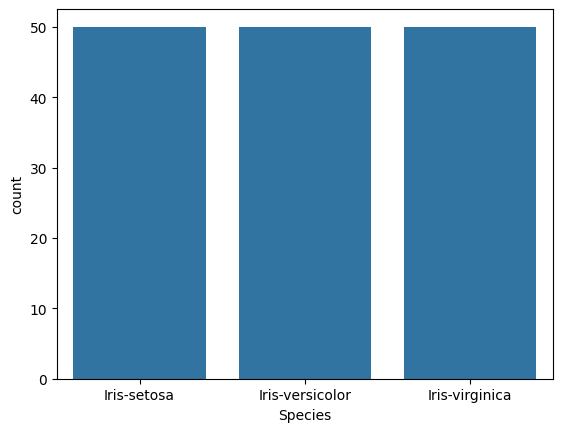

In [ ]:
#Contabilizar quantidade de objetos para cada classe
sns.countplot(data = dados_iris , x = dados_iris.Species);

Em relação à quantidade de espécies, o conjunto de dados possui 50 Iris-setosa, 50 Iris-versicolor e 50 Iris-virginica, demonstrando ser um banco de dados balanceado.

Caracterização estatística dos dados:

In [ ]:
#Descricao estatistica
dados_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Funcao para calcular variaveis estatisticas
def Exploracao_dados(dados):
  mean = np.mean(dados)
  q1 = np.percentile(dados, 25)
  median = np.percentile(dados, 50)
  q3 = np.percentile(dados, 75)
  std = np.std(dados)
  skweness = np.mean(((dados - np.mean(dados)) / np.std(dados)) ** 3)
  kurtosis = np.mean(((dados - np.mean(dados)) / np.std(dados)) ** 4) - 3

  print("Média:", mean)
  print("Mediana:", median)
  print("Primeiro Quartil (Q1):", q1)
  print("Terceiro Quartil (Q3):", q3)
  print("Desvio Padrão:", std)
  print("Obliquidade:", kurtosis)
  print("Curtose:", skweness)

In [ ]:
#Medidas estatisticas para o atributo SepalLengthCm
Exploracao_dados(dados_iris.SepalLengthCm)

Média: 5.843333333333334
Mediana: 5.8
Primeiro Quartil (Q1): 5.1
Terceiro Quartil (Q3): 6.4
Desvio Padrão: 0.8253012917851409
Obliquidade: -0.5735679489249765
Curtose: 0.3117530585022963


In [ ]:
#Medidas estatisticas para o atributo SepalWidthCm
Exploracao_dados(dados_iris.SepalWidthCm)

Média: 3.0540000000000003
Mediana: 3.0
Primeiro Quartil (Q1): 2.8
Terceiro Quartil (Q3): 3.3
Desvio Padrão: 0.4321465800705435
Obliquidade: 0.24144329938318343
Curtose: 0.3307028127733148


In [ ]:
#Medidas estatisticas para o atributo PetalLengthCm
Exploracao_dados(dados_iris.PetalLengthCm)

Média: 3.758666666666666
Mediana: 4.35
Primeiro Quartil (Q1): 1.6
Terceiro Quartil (Q3): 5.1
Desvio Padrão: 1.7585291834055212
Obliquidade: -1.3953593021397133
Curtose: -0.27171195017163846


In [ ]:
#Medidas estatisticas para o atributo PetalWidthCm
Exploracao_dados(dados_iris.PetalWidthCm)

Média: 1.1986666666666668
Mediana: 1.3
Primeiro Quartil (Q1): 0.3
Terceiro Quartil (Q3): 1.8
Desvio Padrão: 0.7606126185881716
Obliquidade: -1.3352456441311857
Curtose: -0.10394366626751737


**d) Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído;**

In [ ]:
#Verificar se ha atributos com valores faltantes
dados_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#Verificar possiveis outliers e valores extremos de um intervalo
dados_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Verificar se ha objetos duplicados
dados_iris.duplicated().sum()

0

In [ ]:
#Verificar valores unicos para SepalLengthCm
pd.unique(dados_iris.SepalLengthCm)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [ ]:
#Verificar valores unicos para SepalWidthCm
pd.unique(dados_iris.SepalWidthCm)

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [ ]:
#Verificar valores unicos para PetalLengthCm
pd.unique(dados_iris.PetalLengthCm)

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [ ]:
#Verificar valores unicos para PetalWidthCm
pd.unique(dados_iris.PetalWidthCm)

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

Logo, o conjunto de dados não é incompleto (não possui atributos com valores faltantes), não é inconsistente (não possui valores incoerentes) e não apresenta redundâncias (não há objetos duplicados e não há atributos que podem ser deduzidos a partir de outros). Não há como termos certeza da existência de dados ruidosos, mas apenas indícios, como a partir da identificação de outliers (que será melhor explorada através da visualização de boxplots na letra f).

Análise complementar quanto a inconsistência dos dados:

Uma forma alternativa de avaliar a inconsistência dos dados é através da análise da dependência linear entre atributos que estão fortemente correlacionados. Traçando-se gráficos da reta que melhor se adequa ao conjunto de objetos, pode-se identificar outliers e possíveis dados inconsistentes por meio da visualização de boxplots e gráficos de dispersão.

Segue abaixo uma aplicação desse método de avaliação para os pares de atributos SepalLengthCm e PetalLengthCm, SepalLengthCm e PetalWidthCm e SepalLengthCm e PetalWidthCm.

In [ ]:
def scaterplot(dado1 , dado2):
  sns.regplot(x=dado1 , y=dado2)


In [ ]:
def plot_boxplot_distancias(dado1, dado2): # Com auxilio Total do ChatGPT
    # Ajustar o modelo de regressão linear aos dados
    modelo = LinearRegression()
    modelo.fit(dado1.values.reshape(-1, 1), dado2)

    # Calcular os valores previstos do modelo para os pontos x
    valores_previstos = modelo.predict(dado1.values.reshape(-1, 1))

    # Calcular as diferenças nas coordenadas x e y entre os pontos e os valores previstos
    delta_y = dado2.values - valores_previstos

    # Calcular a distância de cada ponto à linha de regressão linear
    distancias = np.abs(delta_y)

    # Calcular outliers
    q1 = np.percentile(distancias, 25)
    q3 = np.percentile(distancias, 75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers_indices = [i for i, distancia in enumerate(distancias) if distancia < limite_inferior or distancia > limite_superior]

    # Separar os outliers e os não outliers para dado1
    outliers_dado1 = dado1.iloc[outliers_indices]
    nao_outliers_dado1 = dado1.drop(outliers_indices)

    # Separar os outliers e os não outliers para dado2
    outliers_dado2 = dado2.iloc[outliers_indices]
    nao_outliers_dado2 = dado2.drop(outliers_indices)

    # Plotar os gráficos de regressão
    plt.figure(figsize=(12, 10))

    # Subplot 1: Boxplot das distâncias
    plt.subplot(4, 1, 1)
    plt.boxplot(distancias)
    plt.title('Boxplot das Distâncias à Linha de Regressão Linear')
    plt.ylabel('Distância')

    # Calcular proporção de outliers
    total = len(distancias)
    proporcao_outliers = len(outliers_indices) / total
    proporcao_nao_outliers = (total - len(outliers_indices)) / total

    # Subplot 2: Gráfico de pizza mostrando a proporção de outliers
    plt.subplot(4, 1, 2)
    labels = ['Outliers', 'Não Outliers']
    sizes = [proporcao_outliers, proporcao_nao_outliers]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Proporção de Outliers vs Não Outliers')

    plt.subplot(4, 1, 3)
    plt.title('Gráfico de Dispersão')
    plt.scatter(dado1, dado2, color='blue', label='Gráfico de Dispersão')

    # Subplot 3: Gráfico de dispersão com outliers e não outliers
    plt.subplot(4, 1, 4)

    # Plot dos outliers em azul
    plt.scatter(outliers_dado1, outliers_dado2, color='red', label='Outliers')

    # Plot dos não outliers em vermelho
    plt.scatter(nao_outliers_dado1, nao_outliers_dado2, color='blue', label='Não Outliers')

    # Adicionar legendas e títulos
    plt.xlabel('Dado 1')
    plt.ylabel('Dado 2')
    plt.title('Gráfico de Dispersão com Outliers e Não Outliers')
    plt.legend()

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

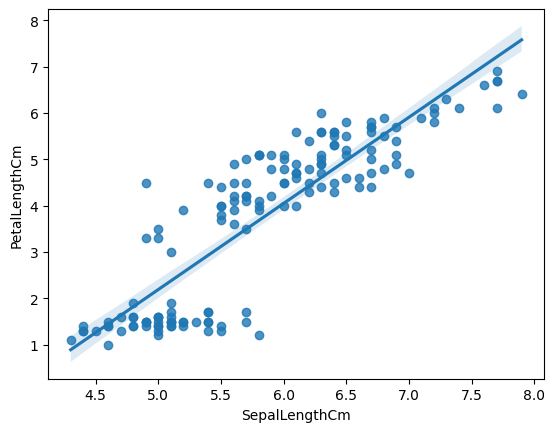

In [ ]:
scaterplot(dados_iris.SepalLengthCm , dados_iris.PetalLengthCm)

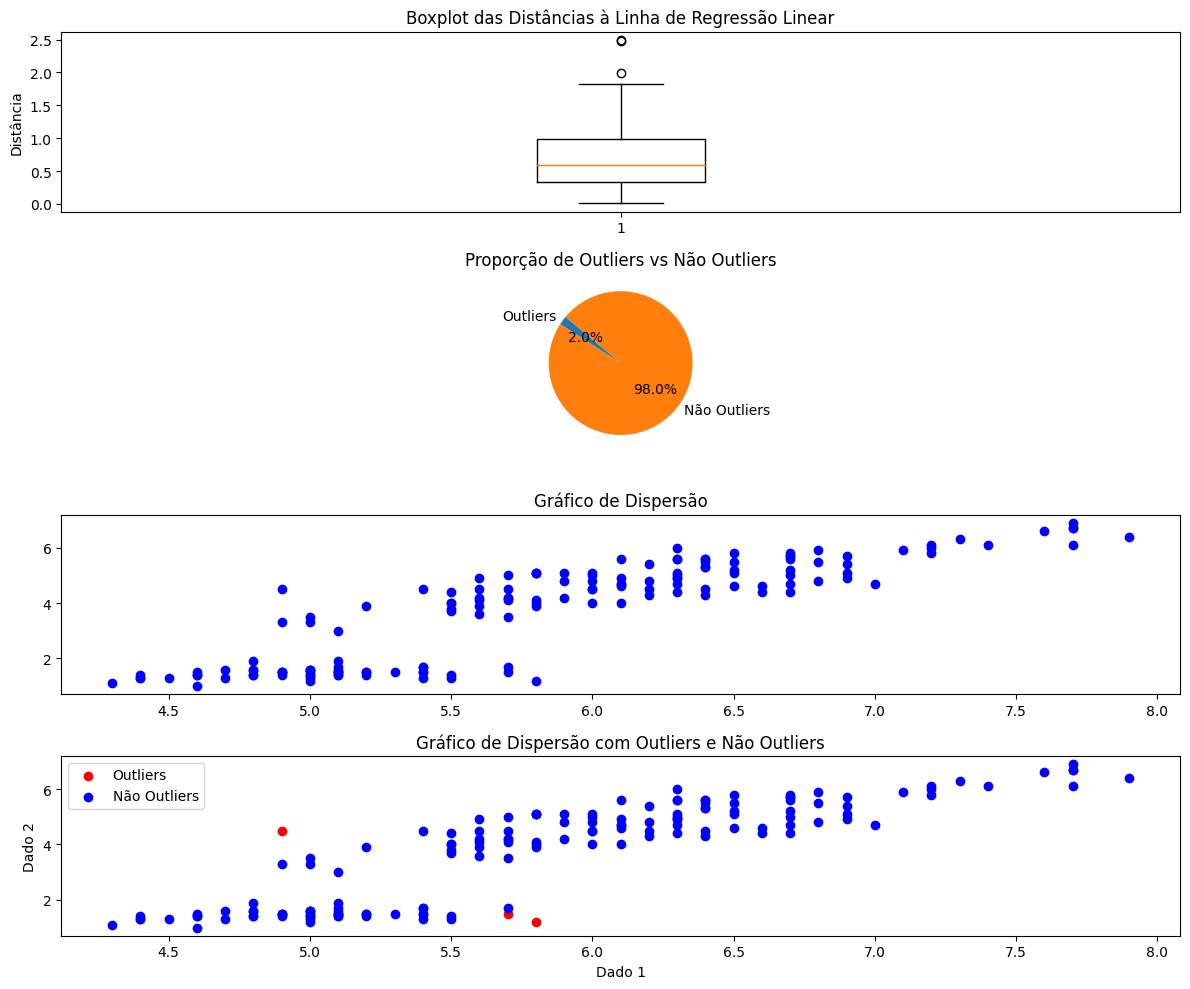

In [ ]:
plot_boxplot_distancias(dados_iris.SepalLengthCm , dados_iris.PetalLengthCm)

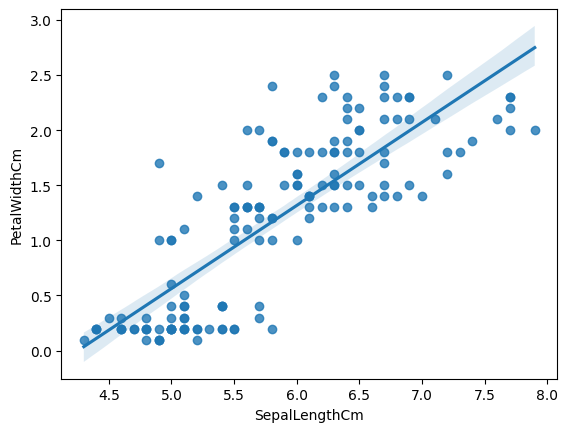

In [ ]:
scaterplot(dados_iris.SepalLengthCm , dados_iris.PetalWidthCm)

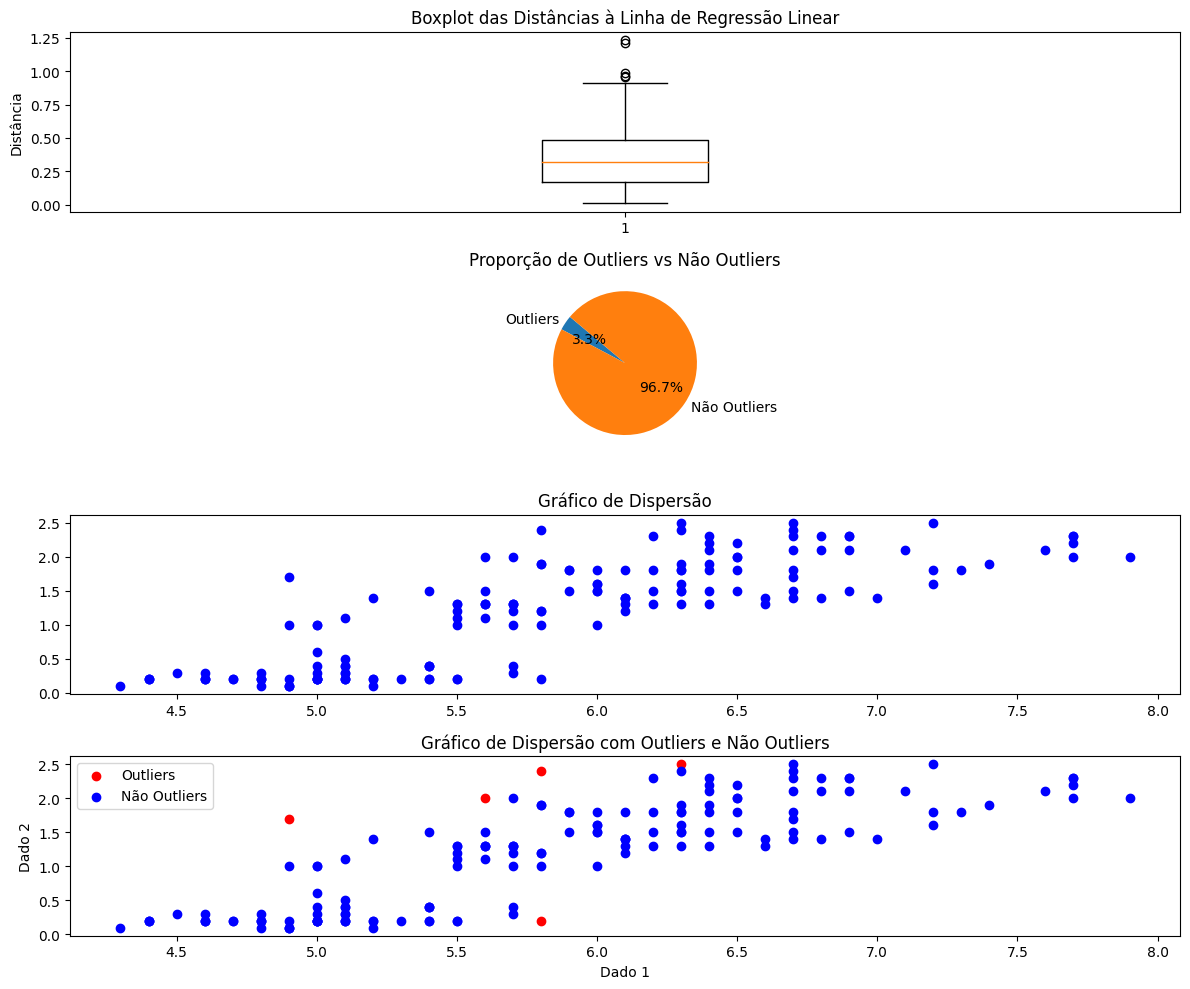

In [ ]:
plot_boxplot_distancias(dados_iris.SepalLengthCm , dados_iris.PetalWidthCm)

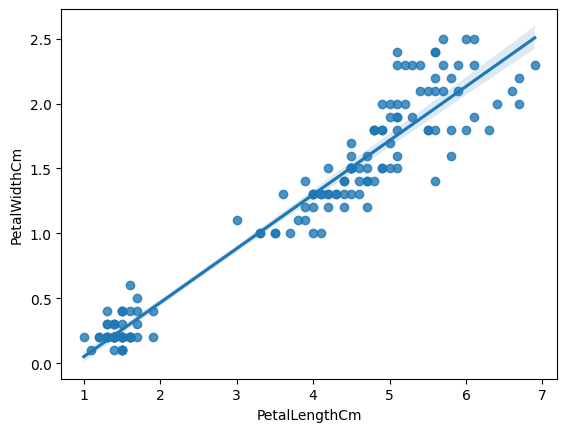

In [ ]:
scaterplot(dados_iris.PetalLengthCm , dados_iris.PetalWidthCm)

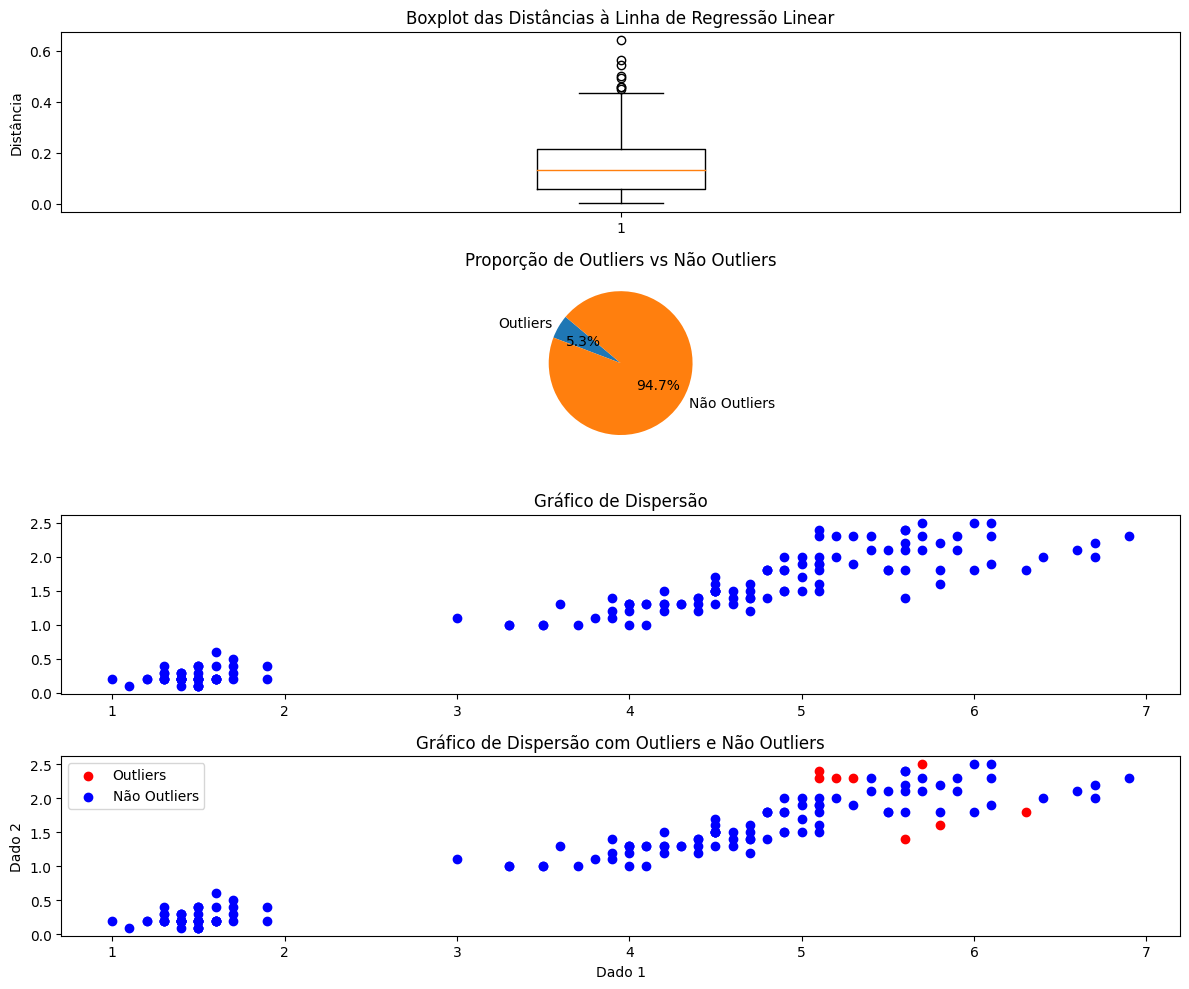

In [ ]:
plot_boxplot_distancias(dados_iris.PetalLengthCm , dados_iris.PetalWidthCm)

**e) Calcule estatísticas multivariadas de covariância e correlação para os atributos quantitativos presentes. Interprete os valores obtidos.**

Valores de Covariância:

In [ ]:
#Covariancia entre SepalLengthCm e SepalWidthCm
dados_iris.SepalLengthCm.cov(dados_iris.SepalWidthCm)

-0.03926845637583893

In [ ]:
#Covariancia entre SepalLengthCm e PetalLengthCm
dados_iris.SepalLengthCm.cov(dados_iris.PetalLengthCm)

1.2736823266219246

In [ ]:
#Covariancia entre SepalLengthCm e PetalWidthCm
dados_iris.SepalLengthCm.cov(dados_iris.PetalWidthCm)

0.5169038031319911

In [ ]:
#Covariancia entre SepalWidthCm e PetalLengthCm
dados_iris.SepalWidthCm.cov(dados_iris.PetalLengthCm)

-0.32171275167785235

In [ ]:
#Covariancia entre SepalWidthCm e PetalWidthCm
dados_iris.SepalWidthCm.cov(dados_iris.PetalWidthCm)

-0.11798120805369115

In [ ]:
#Covariancia entre PetalLengthCm e PetalWidthCm
dados_iris.PetalLengthCm.cov(dados_iris.PetalWidthCm)

1.2963874720357944

Valores de Correlação:

In [ ]:
#Correlacao entre SepalLengthCm e SepalWidthCm
dados_iris.SepalLengthCm.corr(dados_iris.SepalWidthCm)

-0.10936924995064937

In [ ]:
#Correlacao entre SepalWidthCm e PetalLengthCm
dados_iris.SepalWidthCm.corr(dados_iris.PetalLengthCm)

-0.42051609640115445

In [ ]:
#Correlacao entre SepalLengthCm e PetalLengthCm
dados_iris.SepalLengthCm.corr(dados_iris.PetalLengthCm)

0.8717541573048718

In [ ]:
#Correlacao entre SepalLengthCm e PetalWidthCm
dados_iris.SepalLengthCm.corr(dados_iris.PetalWidthCm)

0.8179536333691636

In [ ]:
#Correlacao entre SepalWidthCm e PetalWidthCm
dados_iris.SepalWidthCm.corr(dados_iris.PetalWidthCm)

-0.35654408961380535

In [ ]:
#Correlacao entre PetalLengthCm e PetalWidthCm
dados_iris.PetalLengthCm.corr(dados_iris.PetalWidthCm)

0.9627570970509663

Os valores positivos indicam que quando um dos atributos aumenta, geralmente o outro também aumenta. Os valores negativos indicam o contrário, isto é, quando um dos atributos aumenta, geralmente o outro diminui. Logo, covariância e correlação são medidas estatísticas para avaliar a dependência linear entre duas variáveis.

A correlação é uma medida estatística mais eficiente para avaliar a dependência linear entre atributos, visto que ela não é afetada pela dimensionalidade deles como ocorre com a covariância. Como os valores de correlação variam entre +1 (máxima correlação positiva) e -1 (máxima correlação negativa), os atributos que estão mais fortemente correlacionados de forma positiva são PetalLengthCm e PetalWidthCm, e os atributos que estão mais fortemente correlacionados de forma negativa são SepalWidthCm e PetalLengthCm.

**f) Trace boxplots dos atributos preditivos e identifique a presença ou não de outliers.**

In [ ]:
#Funcao para plotar boxplot
def plotar_boxplot(dados):
  plt.figure(figsize=(8, 10))
  plt.subplot(2, 1, 2)
  sns.boxplot(data = dados , orient="v")
  plt.title(f'Boxplot({dados.name})')
  plt.tight_layout(pad=3.0)

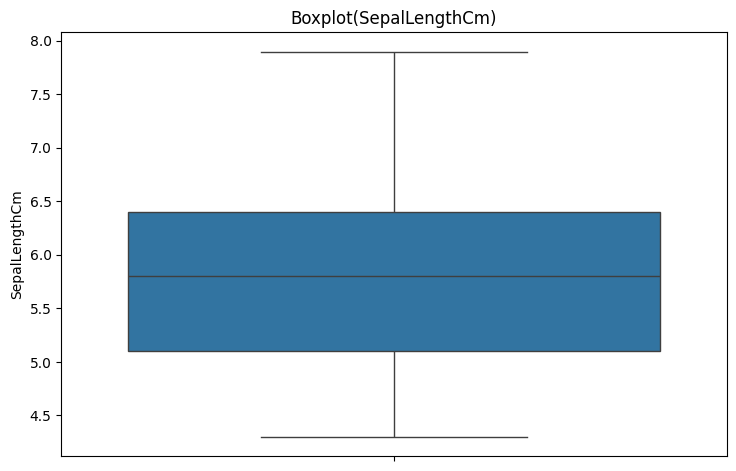

In [ ]:
#Boxplot para SepalLenghtCm
plotar_boxplot(dados_iris.SepalLengthCm)

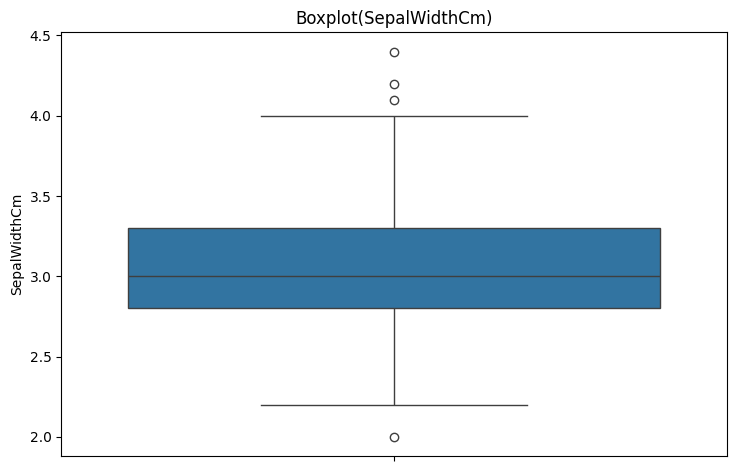

In [ ]:
#Boxplot para SepalWidthCm
plotar_boxplot(dados_iris.SepalWidthCm)

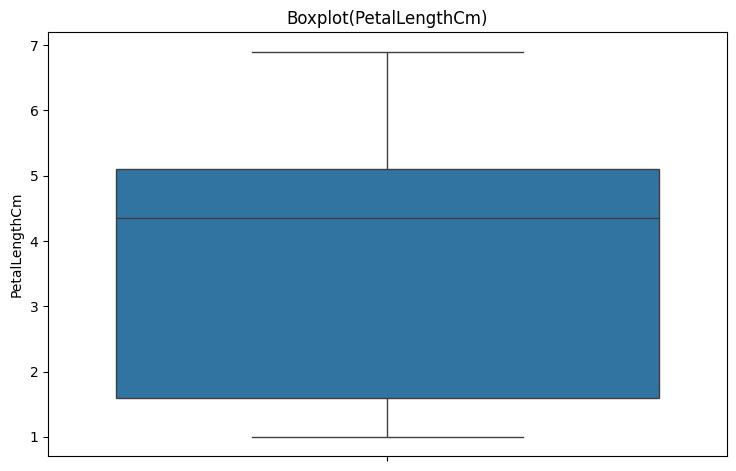

In [ ]:
#Boxplot para PetalLengthCm
plotar_boxplot(dados_iris.PetalLengthCm)

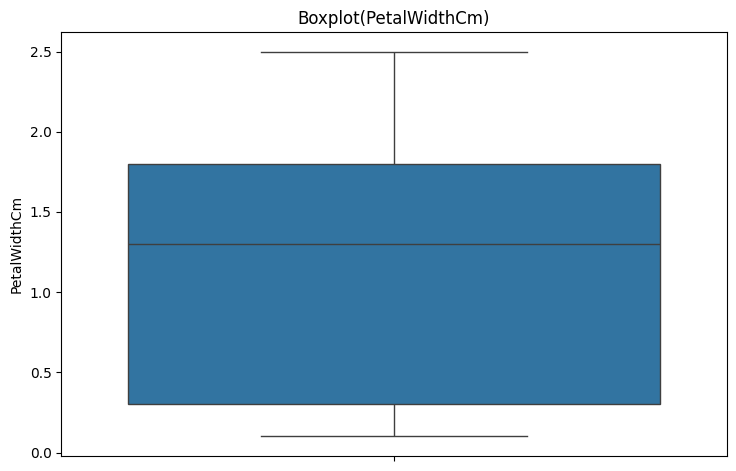

In [ ]:
#Boxplot para PetalWidthCm
plotar_boxplot(dados_iris.PetalWidthCm)

Logo, para o atributo SepalWidthCm, há quatro outliers.

**g) Plote histogramas dos atributos e interprete sua distribuição, considerando as classes.**

In [ ]:
#Funcao para plotar histograma
def plotar_histograma(dados):
  plt.figure(figsize=(8, 10))
  plt.subplot(2, 1, 1)
  plt.title(f'Histograma({dados.name})')
  sns.histplot(data = dados, kde = True , bins=10);
  plt.subplot(2, 1, 2)
  plt.title(f'Histograma({dados.name})')
  sns.histplot(data=dados_iris, x=dados,  bins=10, hue='Species', palette='husl' , kde= True);

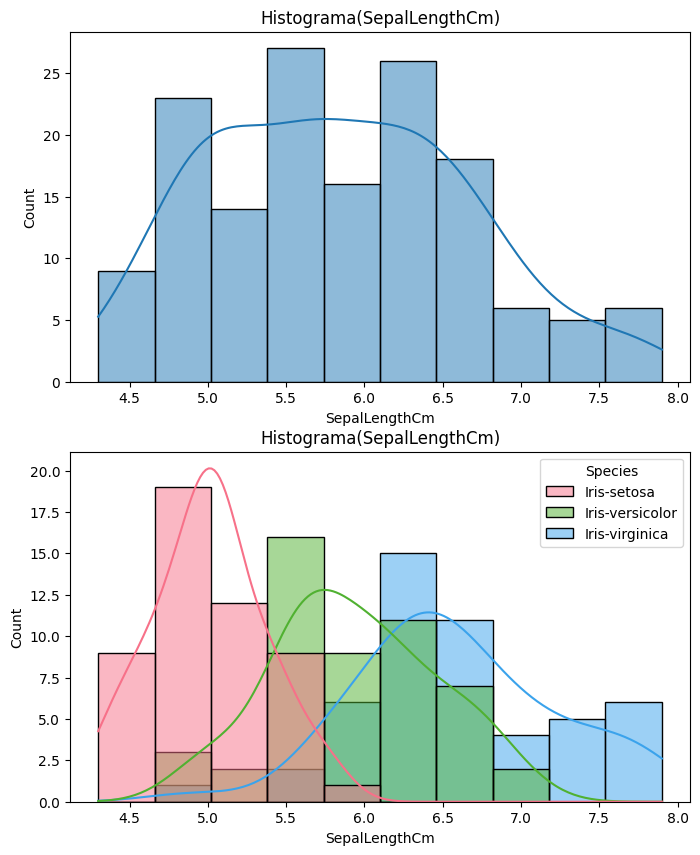

In [ ]:
#Histograma para SepalLengthCm
plotar_histograma(dados_iris.SepalLengthCm)

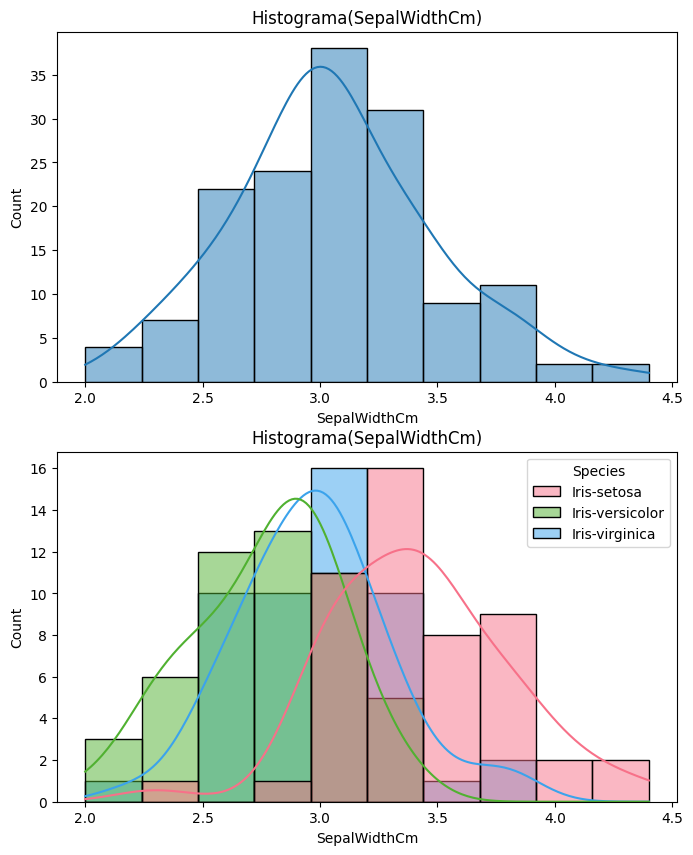

In [ ]:
#Histograma para SepalWidthCm
plotar_histograma(dados_iris.SepalWidthCm)

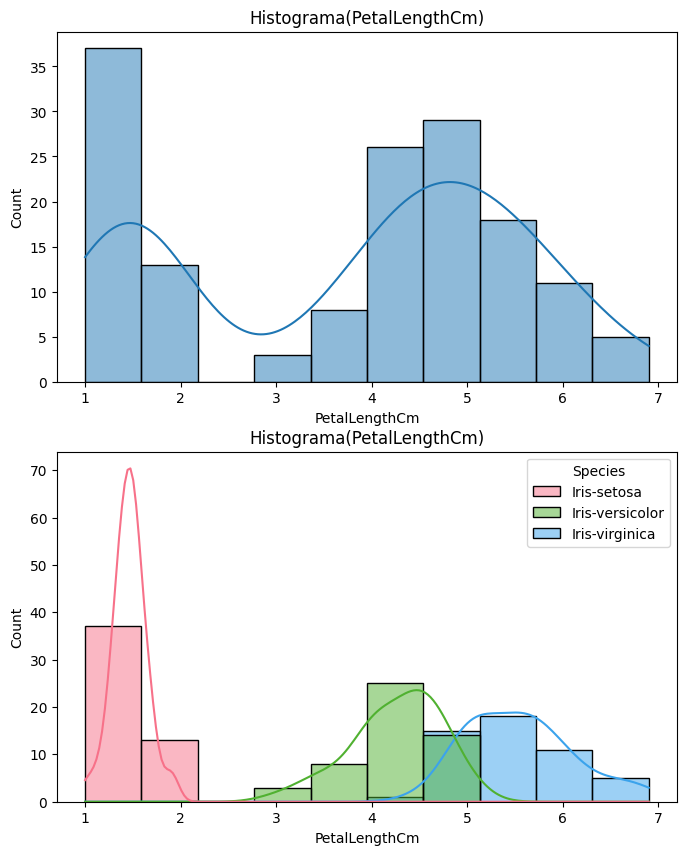

In [ ]:
#Histograma para PetalLengthCm
plotar_histograma(dados_iris.PetalLengthCm)

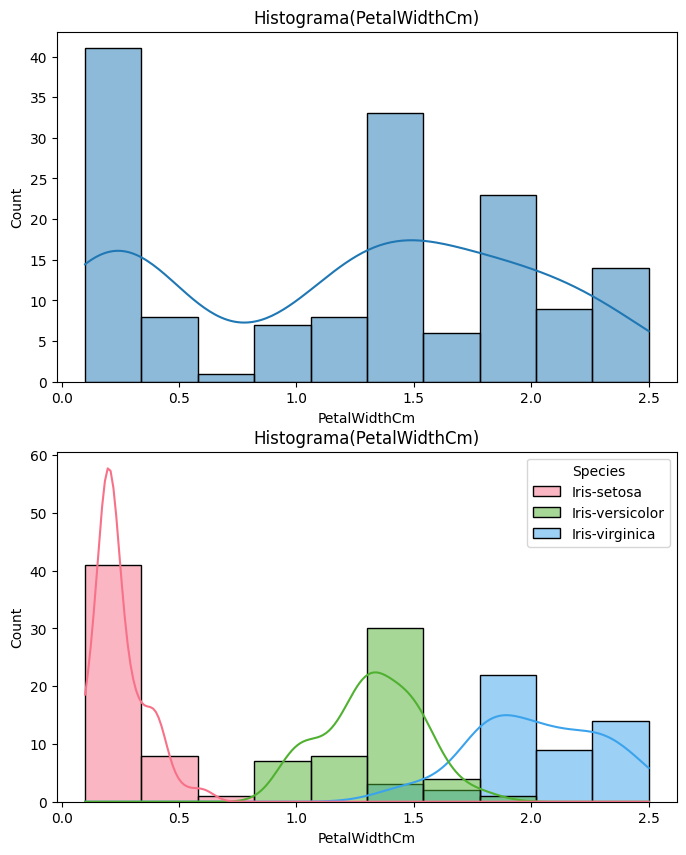

In [ ]:
#Histograma para PetalWidthCm
plotar_histograma(dados_iris.PetalWidthCm)

A partir da observação dos histogramas, pode-se concluir que o atributo PetalLenghtCm é um bom indicativo de separação entre a classe Iris-setosa e as demais. Em contrapartida, não se pode dizer o mesmo para os atributos SepalLenghtCm e SepalWidthCm.

**h) Promova uma transformação de dados consistente com o banco sob análise;**

Para o dataset em questão, deve-se realizar uma transformação nominal-numérica para o atributo Species. Para isso, duas estratégias foram inicialmente consideradas: a Distância de Hamming e, em seguida, a codificação one-hot. Utilizando a Distância de Hamming para o atributo Species, a codificação nominal-numérica será realizada da seguinte forma: 001 (1 em decimal) para Iris-setosa, 010 (2 em decimal) para Iris-versicolor e 100 (4 em decimal) para Iris-virginica. Agora, utilizando one-hot, tivemos que criar os atributos alvos Iris-setosa, Iris-versicolor e Iris-virginica, adicionando 1 no novo atributo alvo correspondente ao rótulo do objeto e 0 aos outros.

In [ ]:
df_iris_hamming = dados_iris.copy()

In [ ]:
df_iris_hamming.Species.replace({'Iris-setosa':1 ,'Iris-versicolor' : 2 , 'Iris-virginica': 4 }, inplace = True)

In [ ]:
df_iris_hamming.Species.value_counts()

Species
1    50
2    50
4    50
Name: count, dtype: int64

In [ ]:
df_iris_ohc = dados_iris.copy()

In [ ]:
df_iris_ohc.iloc[[1, 51, 101]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df_iris_ohc['Iris_setosa'] = df_iris_ohc.Species.apply(lambda x: 1 if x == 'Iris-setosa' else 0);


In [ ]:
df_iris_ohc['Iris_versicolor'] = df_iris_ohc.Species.apply(lambda x: 1 if x == 'Iris-versicolor' else 0);


In [ ]:
df_iris_ohc['Iris_virginica'] = df_iris_ohc.Species.apply(lambda x: 1 if x == 'Iris-virginica' else 0);


In [ ]:
df_iris_ohc = df_iris_ohc.drop('Species', axis = 1)

In [ ]:
df_iris_ohc.iloc[[1, 51, 101]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris_setosa,Iris_versicolor,Iris_virginica
1,2,4.9,3.0,1.4,0.2,1,0,0
51,52,6.4,3.2,4.5,1.5,0,1,0
101,102,5.8,2.7,5.1,1.9,0,0,1


**i) Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de
atributos.**

In [ ]:
#Visualizar os dados
dados_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Remover a feature Id
dados_iris = dados_iris. drop('Id', axis=1)
dados_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Features
X = dados_iris.iloc[:,0:4]

#Target
target = dados_iris.iloc[:,4]
#Combinar features e target em um dataframe:
df = pd.concat([X, target], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
def PCA_manual(X , n_components):
    #Normalizar features
    X_norm = X - np.mean(X , axis = 0)

    #Calcular matriz de covariância
    cov_mat = np.cov(X_norm , rowvar = False)

    #Calcular autovalores e autovetores
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #Ordenar os autovalores
    sort_index = np.argsort(eigen_values)[::-1]
    sort_eigenvalue = eigen_values[sort_index]
    #Ordenar os autovetores
    sort_eigenvectors = eigen_vectors[:,sort_index]
    #Subdivide os autovetores
    eigenvector_n_comp = sort_eigenvectors[:,0:n_components]
    #Calcular novas features:
    new_features= np.dot(eigenvector_n_comp.transpose() , X_norm.transpose() ).transpose()
    #Retornar novas features
    return new_features

Projeção em 1D

In [ ]:
one_comp = PCA_manual(X, 1)
one_comp_feat = pd.DataFrame(one_comp , columns = ['PC1'])

#Combinar PCA1 com variavel alvo para criar um dataset completo
one_comp_df = pd.concat([one_comp_feat ,pd.DataFrame(target)] , axis = 1)
#Para plotar a Primeira Componente Principal, precisamos de uma linha unidimensional na qual y=0:
one_comp_df["y"]=0
one_comp_df.head()

,PC1,Species,y
0,2.684207,Iris-setosa,0
1,2.715391,Iris-setosa,0
2,2.889820,Iris-setosa,0
3,2.746437,Iris-setosa,0
4,2.728593,Iris-setosa,0


Text(0.5, 1.0, 'Atributos transformados para 1D por PCA')

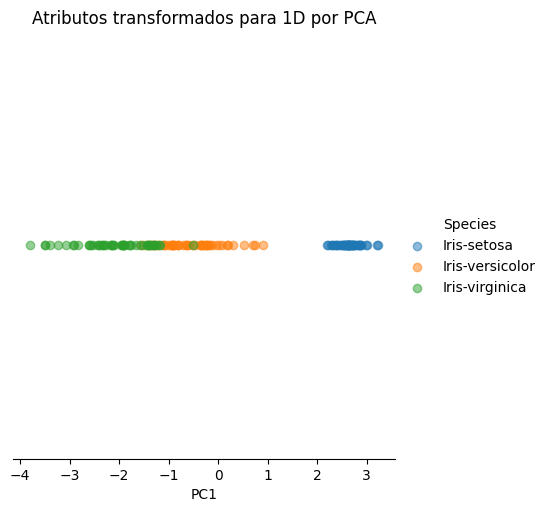

In [ ]:
#Plotar os pontos projetados em uma linha
ax=sns.lmplot(data=one_comp_df,x='PC1',y='y', hue='Species', scatter_kws={'alpha':0.5},fit_reg=False)
ax = plt.gca()
#Ocultar o eixo y
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(-0.05, 0.05)
plt.title("Atributos transformados para 1D por PCA")

Projeção em 2D

In [ ]:
#Aplicar PCA_manual
two_comp= PCA_manual(X , 2)

#Criar um dataframe pandas a partir do dataset reduzido
two_comp_feat = pd.DataFrame(two_comp , columns = ['PC1','PC2'])

#Combinar com a variavel alvo para criar um dataset completo
two_comp_df= pd.concat([two_comp_feat , pd.DataFrame(target)] , axis = 1)
two_comp_df.head()

,PC1,PC2,Species
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa


Text(0.5, 1.0, 'Atributos transformados para 2D por PCA')

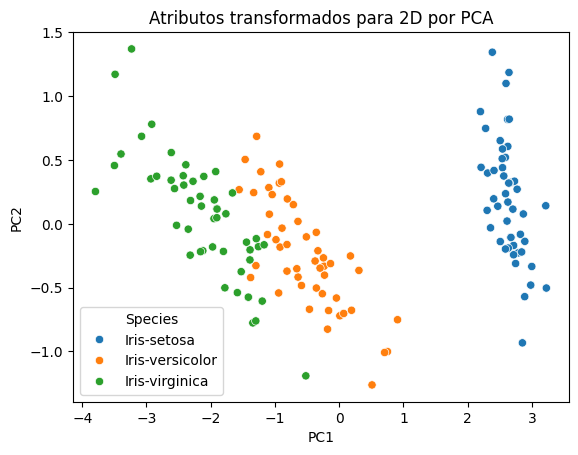

In [ ]:
sns.scatterplot(data=two_comp_df, x='PC1', y='PC2', hue='Species')
plt.title("Atributos transformados para 2D por PCA")

Projeção em 3D

In [ ]:
#Aplicar PCA_manual para tres componentes
three_comp = PCA_manual(X , 3)

#Criar um dataframe Pandas do dataset reduzido
three_comp_feat = pd.DataFrame(three_comp, columns = ['PC1','PC2','PC3'])

#Combinar PCAs com variavel alvo para criar um dataset completo
three_comp_df = pd.concat([three_comp_feat, pd.DataFrame(target)] , axis = 1)
three_comp_df.head()

,PC1,PC2,PC3,Species
0,2.684207,0.326607,0.021512,Iris-setosa
1,2.715391,-0.169557,0.203521,Iris-setosa
2,2.889820,-0.137346,-0.024709,Iris-setosa
3,2.746437,-0.311124,-0.037672,Iris-setosa
4,2.728593,0.333925,-0.096230,Iris-setosa


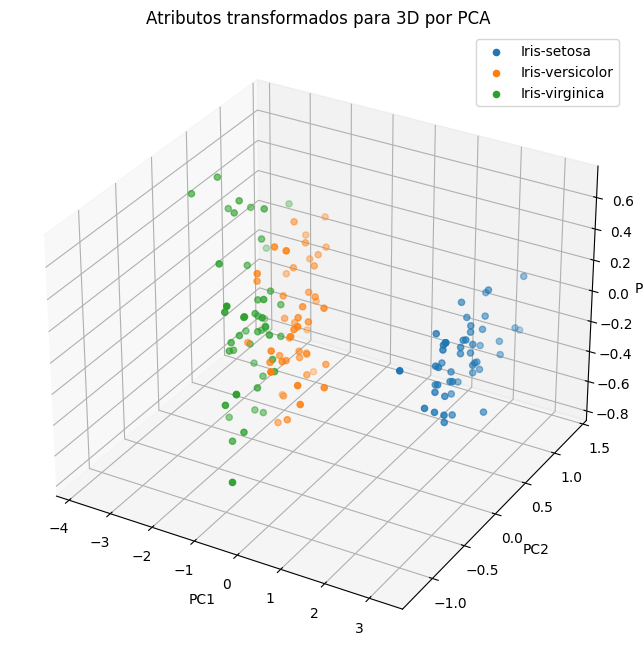

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16 , 8 ))
ax = fig.add_subplot(projection='3d')

for grp_name, grp_idx in three_comp_df.groupby('Species').groups.items():
    x = three_comp_df.iloc[grp_idx,0]
    y = three_comp_df.iloc[grp_idx,1]
    z = three_comp_df.iloc[grp_idx,2]
    ax.scatter(xs = x,ys = y ,zs = z, label=grp_name )

#fig.colorbar(ax.scatter(xs = x,ys = y ,zs = z ), ax = ax, shrink = 0.5, aspect = 5)
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("Atributos transformados para 3D por PCA");
